## Experiment Design
For this experiment we have the same setup as the previous one for one phase only, but now problems have two phases

## Imports and Setup

In [1]:

import random
import os
import sys
from dense_lp_generator import DenseLPGenerator
from simplex_solver import SimplexSolver
from input_parser import LPParser

# IMPORTANT: Set random seed for reproducibility.
random.seed(42)

balanced_sizes = [(i, i) for i in range(5, 101, 5)]
wide_sizes = [(i, 2*i) for i in range(5, 51, 5)]
tall_sizes = [(2*i, i) for i in range(5, 51, 5)]
root_folder = os.path.join('problems', 'problems_pivot_rules_two_phases')
balanced_folder = os.path.join(root_folder, 'balanced_problems')
wide_folder = os.path.join(root_folder, 'wide_problems')
tall_folder = os.path.join(root_folder, 'tall_problems')
random_dense_gen = DenseLPGenerator(precision = 4, allow_negative_rhs=True)

if not os.path.exists(root_folder):
    os.mkdir(root_folder)

if not os.path.exists(balanced_folder):
    os.mkdir(balanced_folder)
    
if not os.path.exists(wide_folder):
    os.mkdir(wide_folder)
    
if not os.path.exists(tall_folder):
    os.mkdir(tall_folder)

## Problem Creation

In [4]:
for (x, y) in balanced_sizes:
    current_size_folder = os.path.join(balanced_folder, f'{x}x{y}')
    if not os.path.exists(current_size_folder):
        os.mkdir(current_size_folder)
    
    for i in range(250):
        random_dense_gen.generate_dense_lp(os.path.join(current_size_folder, f"{i+1}.lp"), x, y)

In [5]:
for (x, y) in wide_sizes:
    current_size_folder = os.path.join(wide_folder, f'{x}x{y}')
    if not os.path.exists(current_size_folder):
        os.mkdir(current_size_folder)
    
    for i in range(250):
        random_dense_gen.generate_dense_lp(os.path.join(current_size_folder, f"{i+1}.lp"), x, y)

In [6]:
for (x, y) in tall_sizes:
    current_size_folder = os.path.join(tall_folder, f'{x}x{y}')
    if not os.path.exists(current_size_folder):
        os.mkdir(current_size_folder)
    
    for i in range(250):
        random_dense_gen.generate_dense_lp(os.path.join(current_size_folder, f"{i+1}.lp"), x, y)

## Dantzig for Balanced

In [2]:
import json
import time
from tqdm import tqdm
dantzig_solver = SimplexSolver(pivot_rule = 'Dantzig')
lp_parser = LPParser()

In [ ]:
for (x, y) in balanced_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(balanced_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = dantzig_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(balanced_folder, f"{x}x{y}", f'dantzig_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 5x5.


100%|██████████| 250/250 [00:00<00:00, 272.42it/s]


Done with size 5x5. Results saved.
Currently solving for size 10x10.


100%|██████████| 250/250 [00:02<00:00, 115.67it/s]


Done with size 10x10. Results saved.
Currently solving for size 15x15.


100%|██████████| 250/250 [00:05<00:00, 43.65it/s]


Done with size 15x15. Results saved.
Currently solving for size 20x20.


100%|██████████| 250/250 [00:13<00:00, 18.26it/s]


Done with size 20x20. Results saved.
Currently solving for size 25x25.


100%|██████████| 250/250 [00:30<00:00,  8.20it/s]


Done with size 25x25. Results saved.
Currently solving for size 30x30.


100%|██████████| 250/250 [00:57<00:00,  4.35it/s]


Done with size 30x30. Results saved.
Currently solving for size 35x35.


100%|██████████| 250/250 [01:46<00:00,  2.34it/s]


Done with size 35x35. Results saved.
Currently solving for size 40x40.


100%|██████████| 250/250 [03:00<00:00,  1.38it/s]


Done with size 40x40. Results saved.
Currently solving for size 45x45.


100%|██████████| 250/250 [04:58<00:00,  1.19s/it]


Done with size 45x45. Results saved.
Currently solving for size 50x50.


100%|██████████| 250/250 [07:43<00:00,  1.86s/it]


Done with size 50x50. Results saved.
Currently solving for size 55x55.


100%|██████████| 250/250 [11:39<00:00,  2.80s/it]


Done with size 55x55. Results saved.
Currently solving for size 60x60.


100%|██████████| 250/250 [17:21<00:00,  4.17s/it]


Done with size 60x60. Results saved.
Currently solving for size 65x65.


100%|██████████| 250/250 [23:43<00:00,  5.69s/it]


Done with size 65x65. Results saved.
Currently solving for size 70x70.


100%|██████████| 250/250 [35:29<00:00,  8.52s/it]


Done with size 70x70. Results saved.
Currently solving for size 75x75.


100%|██████████| 250/250 [47:27<00:00, 11.39s/it]


Done with size 75x75. Results saved.
Currently solving for size 80x80.


100%|██████████| 250/250 [1:05:46<00:00, 15.79s/it]


Done with size 80x80. Results saved.
Currently solving for size 85x85.


100%|██████████| 250/250 [1:26:13<00:00, 20.69s/it]


Done with size 85x85. Results saved.
Currently solving for size 90x90.


100%|██████████| 250/250 [1:52:22<00:00, 26.97s/it]


Done with size 90x90. Results saved.
Currently solving for size 95x95.


100%|██████████| 250/250 [2:25:39<00:00, 34.96s/it]  


Done with size 95x95. Results saved.
Currently solving for size 100x100.


100%|██████████| 250/250 [3:13:30<00:00, 46.44s/it]  

Done with size 100x100. Results saved.


## Random for Balanced

In [5]:
random_solver = SimplexSolver(pivot_rule = 'Random')

In [6]:
for (x, y) in balanced_sizes:
    if x < 95:
        continue
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(balanced_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = random_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(balanced_folder, f"{x}x{y}", f'random_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 95x95.


100%|██████████| 250/250 [3:39:53<00:00, 52.77s/it]  


Done with size 95x95. Results saved.
Currently solving for size 100x100.


100%|██████████| 250/250 [4:41:46<00:00, 67.63s/it]  

Done with size 100x100. Results saved.


## Bland for Balanced

In [7]:
bland_solver = SimplexSolver(pivot_rule = 'Bland')

In [8]:
for (x, y) in balanced_sizes:
    if x < 70:
        continue
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(balanced_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = bland_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(balanced_folder, f"{x}x{y}", f'bland_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 70x70.


100%|██████████| 250/250 [2:12:45<00:00, 31.86s/it]  


Done with size 70x70. Results saved.
Currently solving for size 75x75.


100%|██████████| 250/250 [3:02:36<00:00, 43.83s/it]  


Done with size 75x75. Results saved.
Currently solving for size 80x80.


  3%|▎         | 7/250 [08:49<5:06:25, 75.66s/it]


KeyboardInterrupt: 

## Steepest Edge for Balanced

In [5]:
steepest_edge_solver = SimplexSolver(pivot_rule="SteepestEdge")

In [8]:
for (x, y) in balanced_sizes:
    if x < 90:
        continue
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(balanced_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = steepest_edge_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(balanced_folder, f"{x}x{y}", f'steepest_edge_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 90x90.


100%|██████████| 250/250 [37:56<00:00,  9.11s/it]


Done with size 90x90. Results saved.
Currently solving for size 95x95.


100%|██████████| 250/250 [48:17<00:00, 11.59s/it]


Done with size 95x95. Results saved.
Currently solving for size 100x100.


100%|██████████| 250/250 [1:02:10<00:00, 14.92s/it]

Done with size 100x100. Results saved.


## Dantzig for Wide

In [6]:
for (x, y) in wide_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(wide_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = dantzig_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(wide_folder, f"{x}x{y}", f'dantzig_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 5x10.


100%|██████████| 250/250 [00:01<00:00, 195.29it/s]


Done with size 5x10. Results saved.
Currently solving for size 10x20.


100%|██████████| 250/250 [00:05<00:00, 49.73it/s]


Done with size 10x20. Results saved.
Currently solving for size 15x30.


100%|██████████| 250/250 [00:17<00:00, 13.94it/s]


Done with size 15x30. Results saved.
Currently solving for size 20x40.


100%|██████████| 250/250 [00:45<00:00,  5.49it/s]


Done with size 20x40. Results saved.
Currently solving for size 25x50.


100%|██████████| 250/250 [01:44<00:00,  2.40it/s]


Done with size 25x50. Results saved.
Currently solving for size 30x60.


100%|██████████| 250/250 [03:24<00:00,  1.22it/s]


Done with size 30x60. Results saved.
Currently solving for size 35x70.


100%|██████████| 250/250 [06:09<00:00,  1.48s/it]


Done with size 35x70. Results saved.
Currently solving for size 40x80.


100%|██████████| 250/250 [10:28<00:00,  2.51s/it]


Done with size 40x80. Results saved.
Currently solving for size 45x90.


100%|██████████| 250/250 [17:49<00:00,  4.28s/it]


Done with size 45x90. Results saved.
Currently solving for size 50x100.


100%|██████████| 250/250 [28:26<00:00,  6.83s/it]

Done with size 50x100. Results saved.


## Random for Wide

In [6]:
for (x, y) in wide_sizes:
    if x < 50:
        continue
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(wide_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = random_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(wide_folder, f"{x}x{y}", f'random_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 50x100.


  0%|          | 0/250 [00:00<?, ?it/s]

100%|██████████| 250/250 [45:37<00:00, 10.95s/it]

Done with size 50x100. Results saved.


## Bland for Wide

In [8]:
for (x, y) in wide_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(wide_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = bland_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(wide_folder, f"{x}x{y}", f'bland_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 5x10.


100%|██████████| 250/250 [00:00<00:00, 447.84it/s]


Done with size 5x10. Results saved.
Currently solving for size 10x20.


100%|██████████| 250/250 [00:05<00:00, 43.76it/s]


Done with size 10x20. Results saved.
Currently solving for size 15x30.


100%|██████████| 250/250 [00:29<00:00,  8.61it/s]


Done with size 15x30. Results saved.
Currently solving for size 20x40.


100%|██████████| 250/250 [01:27<00:00,  2.87it/s]


Done with size 20x40. Results saved.
Currently solving for size 25x50.


100%|██████████| 250/250 [03:56<00:00,  1.06it/s]


Done with size 25x50. Results saved.
Currently solving for size 30x60.


100%|██████████| 250/250 [08:30<00:00,  2.04s/it]


Done with size 30x60. Results saved.
Currently solving for size 35x70.


100%|██████████| 250/250 [17:13<00:00,  4.13s/it]


Done with size 35x70. Results saved.
Currently solving for size 40x80.


100%|██████████| 250/250 [33:05<00:00,  7.94s/it]


Done with size 40x80. Results saved.
Currently solving for size 45x90.


100%|██████████| 250/250 [59:33<00:00, 14.30s/it] 


Done with size 45x90. Results saved.
Currently solving for size 50x100.


100%|██████████| 250/250 [1:41:27<00:00, 24.35s/it]

Done with size 50x100. Results saved.


## Steepest Edge for Wide

In [7]:
for (x, y) in wide_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(wide_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = steepest_edge_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(wide_folder, f"{x}x{y}", f'steepest_edge_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 5x10.


100%|██████████| 250/250 [00:01<00:00, 204.18it/s]


Done with size 5x10. Results saved.
Currently solving for size 10x20.


100%|██████████| 250/250 [00:04<00:00, 59.43it/s]


Done with size 10x20. Results saved.
Currently solving for size 15x30.


100%|██████████| 250/250 [00:12<00:00, 19.39it/s]


Done with size 15x30. Results saved.
Currently solving for size 20x40.


100%|██████████| 250/250 [00:29<00:00,  8.47it/s]


Done with size 20x40. Results saved.
Currently solving for size 25x50.


100%|██████████| 250/250 [01:01<00:00,  4.07it/s]


Done with size 25x50. Results saved.
Currently solving for size 30x60.


100%|██████████| 250/250 [01:49<00:00,  2.29it/s]


Done with size 30x60. Results saved.
Currently solving for size 35x70.


100%|██████████| 250/250 [03:02<00:00,  1.37it/s]


Done with size 35x70. Results saved.
Currently solving for size 40x80.


100%|██████████| 250/250 [04:47<00:00,  1.15s/it]


Done with size 40x80. Results saved.
Currently solving for size 45x90.


100%|██████████| 250/250 [07:26<00:00,  1.79s/it]


Done with size 45x90. Results saved.
Currently solving for size 50x100.


100%|██████████| 250/250 [10:53<00:00,  2.61s/it]

Done with size 50x100. Results saved.


## Dantzig for Tall

In [7]:
for (x, y) in tall_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(tall_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = dantzig_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(tall_folder, f"{x}x{y}", f'dantzig_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 10x5.


100%|██████████| 250/250 [00:00<00:00, 697.36it/s]


Done with size 10x5. Results saved.
Currently solving for size 20x10.


100%|██████████| 250/250 [00:02<00:00, 100.90it/s]


Done with size 20x10. Results saved.
Currently solving for size 30x15.


100%|██████████| 250/250 [00:09<00:00, 26.70it/s]


Done with size 30x15. Results saved.
Currently solving for size 40x20.


100%|██████████| 250/250 [00:24<00:00, 10.30it/s]


Done with size 40x20. Results saved.
Currently solving for size 50x25.


100%|██████████| 250/250 [00:53<00:00,  4.65it/s]


Done with size 50x25. Results saved.
Currently solving for size 60x30.


100%|██████████| 250/250 [01:41<00:00,  2.46it/s]


Done with size 60x30. Results saved.
Currently solving for size 70x35.


100%|██████████| 250/250 [03:05<00:00,  1.35it/s]


Done with size 70x35. Results saved.
Currently solving for size 80x40.


100%|██████████| 250/250 [05:05<00:00,  1.22s/it]


Done with size 80x40. Results saved.
Currently solving for size 90x45.


100%|██████████| 250/250 [08:20<00:00,  2.00s/it]


Done with size 90x45. Results saved.
Currently solving for size 100x50.


100%|██████████| 250/250 [12:40<00:00,  3.04s/it]

Done with size 100x50. Results saved.


## Random for Tall

In [8]:
for (x, y) in tall_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(tall_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = random_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(tall_folder, f"{x}x{y}", f'random_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 10x5.


100%|██████████| 250/250 [00:00<00:00, 455.31it/s]


Done with size 10x5. Results saved.
Currently solving for size 20x10.


100%|██████████| 250/250 [00:03<00:00, 67.45it/s]


Done with size 20x10. Results saved.
Currently solving for size 30x15.


100%|██████████| 250/250 [00:15<00:00, 16.11it/s]


Done with size 30x15. Results saved.
Currently solving for size 40x20.


100%|██████████| 250/250 [00:43<00:00,  5.69it/s]


Done with size 40x20. Results saved.
Currently solving for size 50x25.


100%|██████████| 250/250 [01:43<00:00,  2.42it/s]


Done with size 50x25. Results saved.
Currently solving for size 60x30.


100%|██████████| 250/250 [03:21<00:00,  1.24it/s]


Done with size 60x30. Results saved.
Currently solving for size 70x35.


100%|██████████| 250/250 [06:16<00:00,  1.51s/it]


Done with size 70x35. Results saved.
Currently solving for size 80x40.


100%|██████████| 250/250 [10:24<00:00,  2.50s/it]


Done with size 80x40. Results saved.
Currently solving for size 90x45.


100%|██████████| 250/250 [17:31<00:00,  4.21s/it]


Done with size 90x45. Results saved.
Currently solving for size 100x50.


100%|██████████| 250/250 [25:48<00:00,  6.19s/it]

Done with size 100x50. Results saved.


## Bland for Tall

In [9]:
for (x, y) in tall_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(tall_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = bland_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(tall_folder, f"{x}x{y}", f'bland_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 10x5.


100%|██████████| 250/250 [00:00<00:00, 593.97it/s]


Done with size 10x5. Results saved.
Currently solving for size 20x10.


100%|██████████| 250/250 [00:03<00:00, 65.64it/s]


Done with size 20x10. Results saved.
Currently solving for size 30x15.


100%|██████████| 250/250 [00:17<00:00, 14.15it/s]


Done with size 30x15. Results saved.
Currently solving for size 40x20.


100%|██████████| 250/250 [00:55<00:00,  4.54it/s]


Done with size 40x20. Results saved.
Currently solving for size 50x25.


100%|██████████| 250/250 [02:24<00:00,  1.74it/s]


Done with size 50x25. Results saved.
Currently solving for size 60x30.


100%|██████████| 250/250 [05:22<00:00,  1.29s/it]


Done with size 60x30. Results saved.
Currently solving for size 70x35.


100%|██████████| 250/250 [11:12<00:00,  2.69s/it]


Done with size 70x35. Results saved.
Currently solving for size 80x40.


100%|██████████| 250/250 [20:49<00:00,  5.00s/it]


Done with size 80x40. Results saved.
Currently solving for size 90x45.


100%|██████████| 250/250 [37:56<00:00,  9.11s/it]


Done with size 90x45. Results saved.
Currently solving for size 100x50.


100%|██████████| 250/250 [1:01:14<00:00, 14.70s/it]

Done with size 100x50. Results saved.


# Steepest Edge for Tall

In [6]:
for (x, y) in tall_sizes:
    print(f'Currently solving for size {x}x{y}.')
    current_size_results = {}

    for i in tqdm(range(1, 251)):
        lp_parser.parse_file(os.path.join(tall_folder, f"{x}x{y}", f"{i}.lp"))

        start_time = time.time()
        my_solver_output = steepest_edge_solver.solve(lp_parser)
        end_time = time.time()

        my_solver_output['total_time'] = (end_time - start_time) * 1000
        current_size_results[f"{i}.lp"] = my_solver_output
    
    with open(os.path.join(tall_folder, f"{x}x{y}", f'steepest_edge_results.json'), 'w') as f:
        json.dump(current_size_results, f, indent = 4)
    
    print(f'Done with size {x}x{y}. Results saved.')

Currently solving for size 10x5.


100%|██████████| 250/250 [00:01<00:00, 223.28it/s]


Done with size 10x5. Results saved.
Currently solving for size 20x10.


100%|██████████| 250/250 [00:03<00:00, 73.18it/s]


Done with size 20x10. Results saved.
Currently solving for size 30x15.


100%|██████████| 250/250 [00:09<00:00, 25.66it/s]


Done with size 30x15. Results saved.
Currently solving for size 40x20.


100%|██████████| 250/250 [00:22<00:00, 11.24it/s]


Done with size 40x20. Results saved.
Currently solving for size 50x25.


100%|██████████| 250/250 [00:44<00:00,  5.66it/s]


Done with size 50x25. Results saved.
Currently solving for size 60x30.


100%|██████████| 250/250 [01:19<00:00,  3.16it/s]


Done with size 60x30. Results saved.
Currently solving for size 70x35.


100%|██████████| 250/250 [02:17<00:00,  1.82it/s]


Done with size 70x35. Results saved.
Currently solving for size 80x40.


100%|██████████| 250/250 [03:33<00:00,  1.17it/s]


Done with size 80x40. Results saved.
Currently solving for size 90x45.


100%|██████████| 250/250 [05:30<00:00,  1.32s/it]


Done with size 90x45. Results saved.
Currently solving for size 100x50.


100%|██████████| 250/250 [08:04<00:00,  1.94s/it]

Done with size 100x50. Results saved.


## Calculating averages (only for pivot rules that finished)
For now, for balanced only Dantzig and Steepest Edge have finished, but for wide and tall all of the rules have finished.

### For Wide and Tall

In [3]:
import numpy as np

In [6]:
pivot_rules = ["dantzig", "random", "bland", "steepest_edge"]
metrics = ["total_time", "num_pivot_steps_first_phase", "num_pivot_steps_second_phase", "num_pivot_steps_total"]
categories = {
    "wide_problems": wide_sizes,
    "tall_problems": tall_sizes,
}
results = {cat: {metric: {rule: [] for rule in pivot_rules} for metric in metrics} for cat in categories}

# Iterate through categories and sizes
for category, sizes in categories.items():
    for size in sizes:
        folder_name = f"{size[0]}x{size[1]}"
        folder_path = os.path.join(root_folder, category, folder_name)
        
        if not os.path.exists(folder_path):
            print("incorrect folder")
            continue
        
        avg_results = {metric: {} for metric in metrics}
        
        for rule in pivot_rules:
            file_path = os.path.join(folder_path, f"{rule}_results.json")
            if not os.path.exists(file_path):
                print("incorrect file")
                continue
            
            with open(file_path, "r") as f:
                data = json.load(f)
            
            # Extract values
            total_time = [entry["total_time"] for entry in data.values()]
            num_pivot_steps_first_phase = [entry["num_pivot_steps_first_phase"] for entry in data.values() if "num_pivot_steps_first_phase" in entry]
            num_pivot_steps_second_phase = [entry["num_pivot_steps_second_phase"] for entry in data.values() if "num_pivot_steps_second_phase" in entry]
            
            # Compute and store averages
            avg_results["total_time"][rule] = np.mean(total_time) if total_time else 0
            avg_results["num_pivot_steps_first_phase"][rule] = np.mean(num_pivot_steps_first_phase) if num_pivot_steps_first_phase else 0
            avg_results["num_pivot_steps_second_phase"][rule] = np.mean(num_pivot_steps_second_phase) if num_pivot_steps_second_phase else 0

            num_pivot_steps_second_phase = [
                entry.get("num_pivot_steps_second_phase", 0) for entry in data.values()
            ]

            num_pivot_steps_total = [
                first + second for first, second in zip(num_pivot_steps_first_phase, num_pivot_steps_second_phase)
            ]
            avg_results["num_pivot_steps_total"][rule] = np.mean(num_pivot_steps_total) if num_pivot_steps_total else 0


        # Save averages to JSON file in the same folder
        with open(os.path.join(folder_path, "averages.json"), "w") as f:
            json.dump(avg_results, f, indent=4)

print("Averages computed and stored successfully!")

Averages computed and stored successfully!


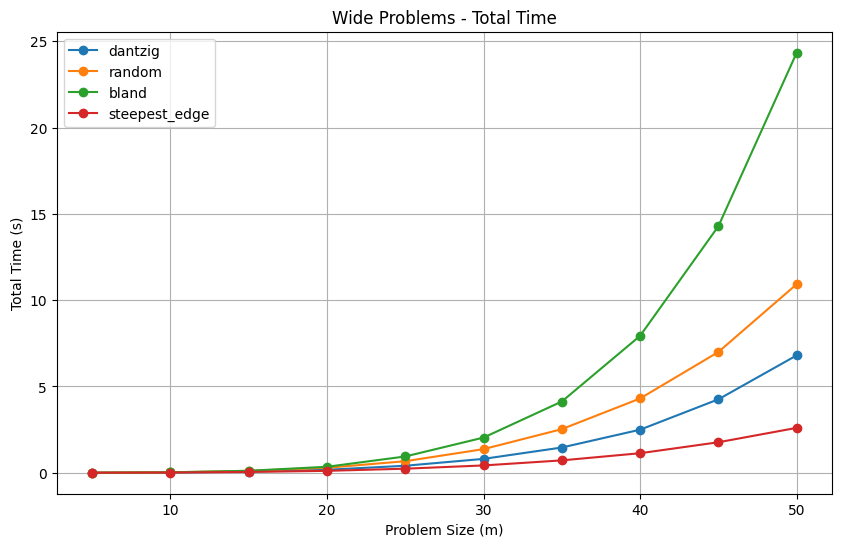

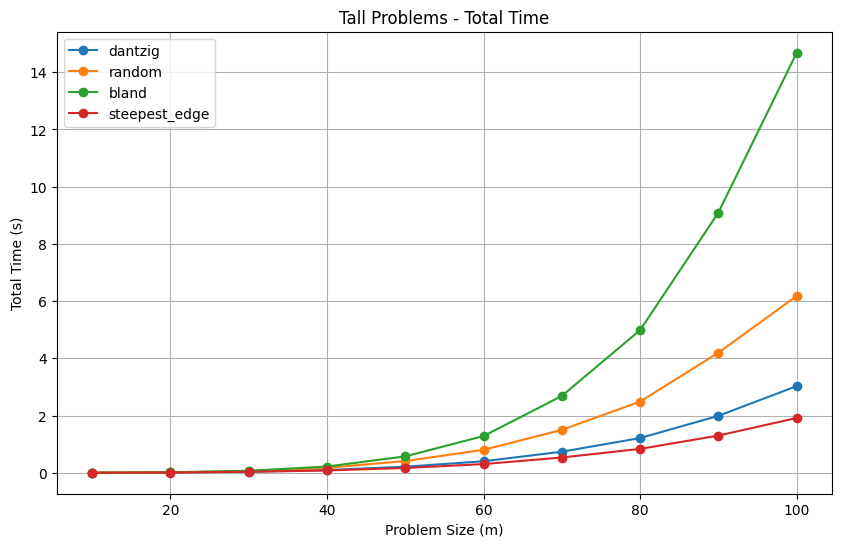

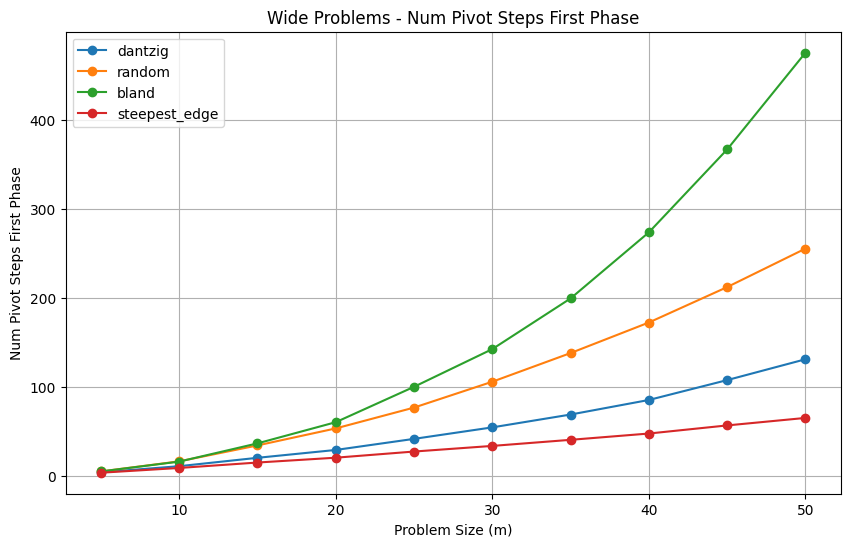

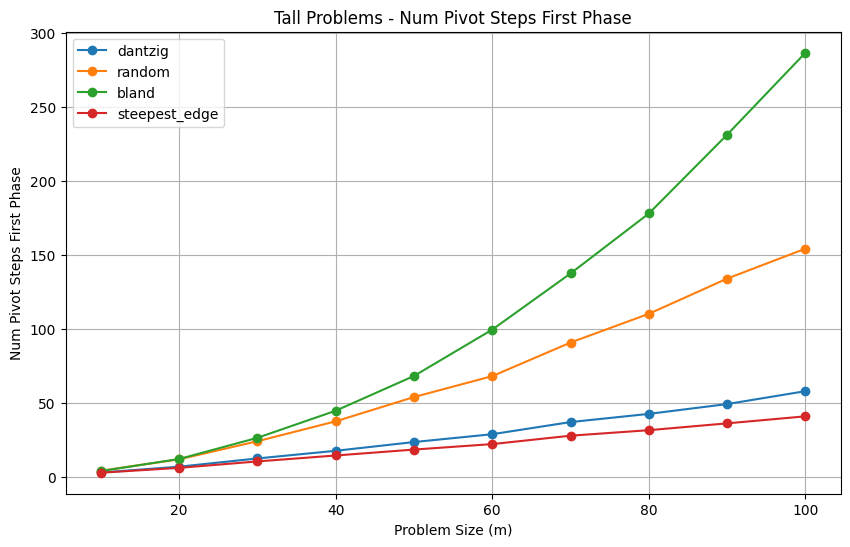

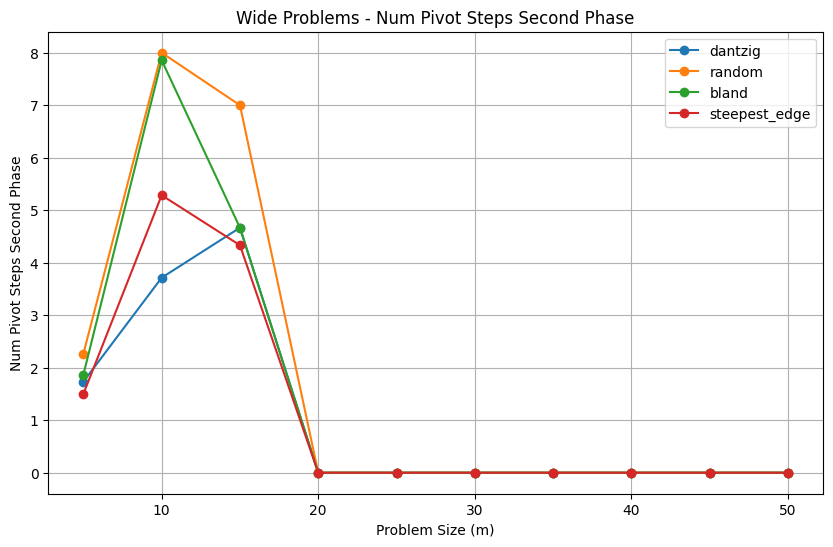

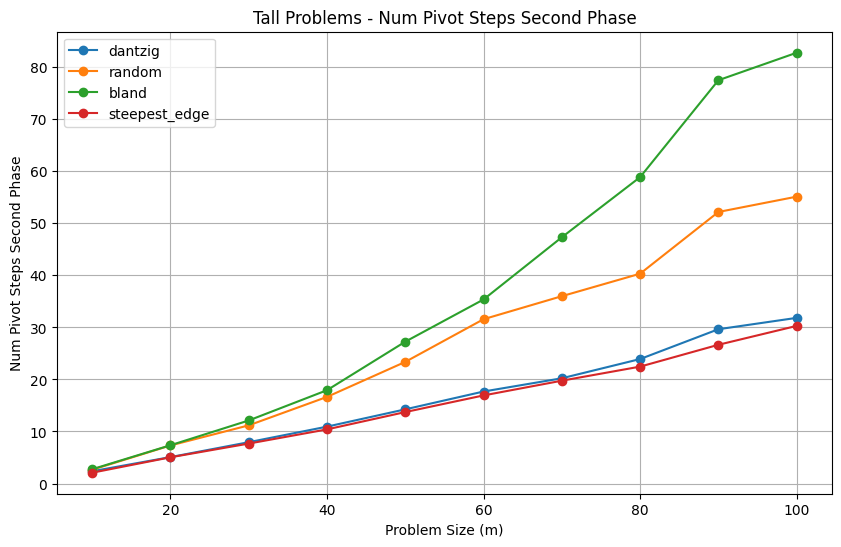

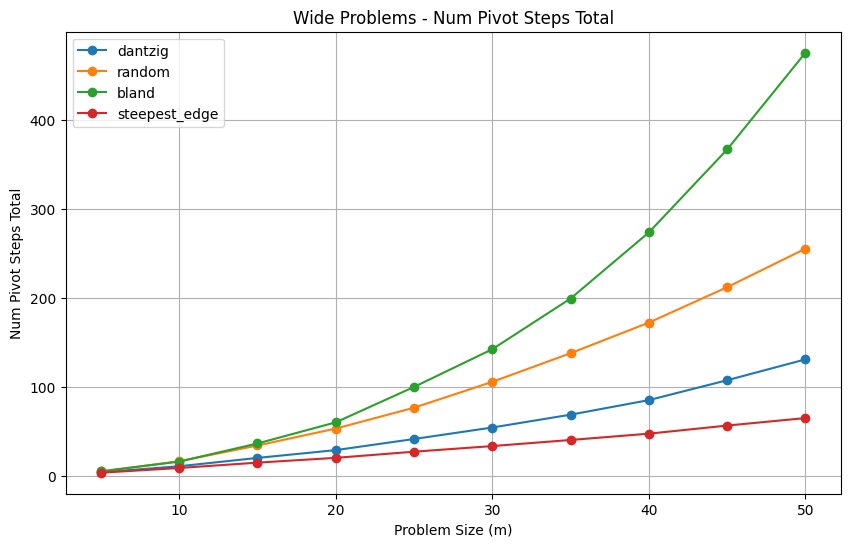

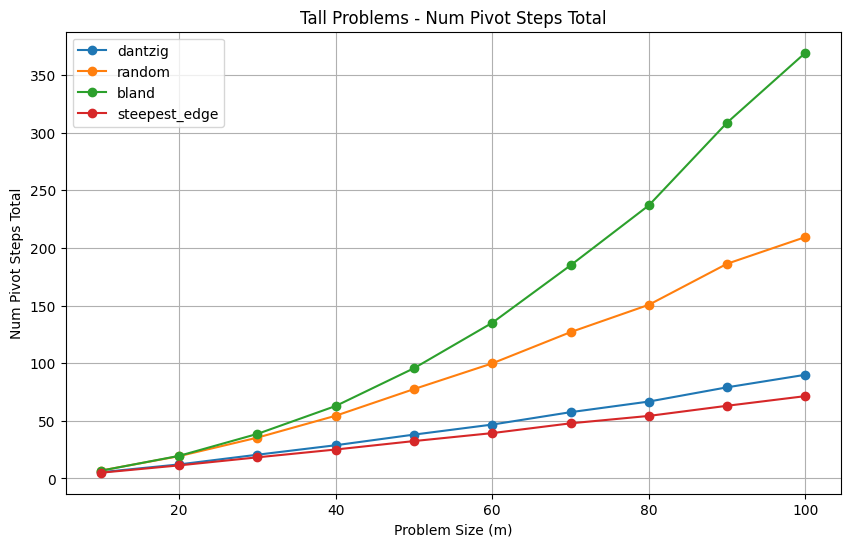

In [13]:

import matplotlib.pyplot as plt

# Storage for plotting
plot_data = {cat: {metric: {rule: [] for rule in pivot_rules} for metric in metrics} for cat in categories}

# Read stored averages
for category, sizes in categories.items():
    for size in sizes:
        folder_name = f"{size[0]}x{size[1]}"
        folder_path = os.path.join(root_folder, category, folder_name)
        avg_file = os.path.join(folder_path, "averages.json")

        if not os.path.exists(avg_file):
            print(avg_file)
            continue
        
        with open(avg_file, "r") as f:
            avg_results = json.load(f)

        for metric in metrics:
            for rule in pivot_rules:
                plot_data[category][metric][rule].append(avg_results.get(metric, {}).get(rule, 0))

for category in categories:
    for rule in pivot_rules:
        plot_data[category]["total_time"][rule] = [t / 1000 for t in plot_data[category]["total_time"][rule]]

# Generate plots
for metric in metrics:
    for category, sizes in categories.items():
        plt.figure(figsize=(10, 6))
        
        for rule in pivot_rules:
            plt.plot([s[0] for s in sizes], plot_data[category][metric][rule], label=rule, marker="o")
        
        plt.xlabel("Problem Size (m)")
        ylabel = metric.replace("_", " ").title()
        if metric == "total_time":
            ylabel += " (s)"
        plt.ylabel(ylabel)
        plt.title(f"{category.replace('_', ' ').title()} - {metric.replace('_', ' ').title()}")
        plt.legend()
        plt.grid(True)

        if not os.path.exists("./plots"):
            os.mkdir("plots")
        
        if not os.path.exists(os.path.join("plots", "pivot_rules")):
            os.mkdir(os.path.join("plots", "pivot_rules"))
        
        if not os.path.exists(os.path.join("plots", "pivot_rules", "two_phases")):
            os.mkdir(os.path.join("plots", "pivot_rules", "two_phases"))

        if not os.path.exists(os.path.join("plots", "pivot_rules", "two_phases", category.split("_")[0])):
            os.mkdir(os.path.join("plots", "pivot_rules", "two_phases", category.split("_")[0]))
        

        plt.savefig(os.path.join("plots", "pivot_rules", "two_phases", category.split("_")[0], f"{category.split('_')[0]}_{metric}.pdf"), format="pdf")

        plt.show()

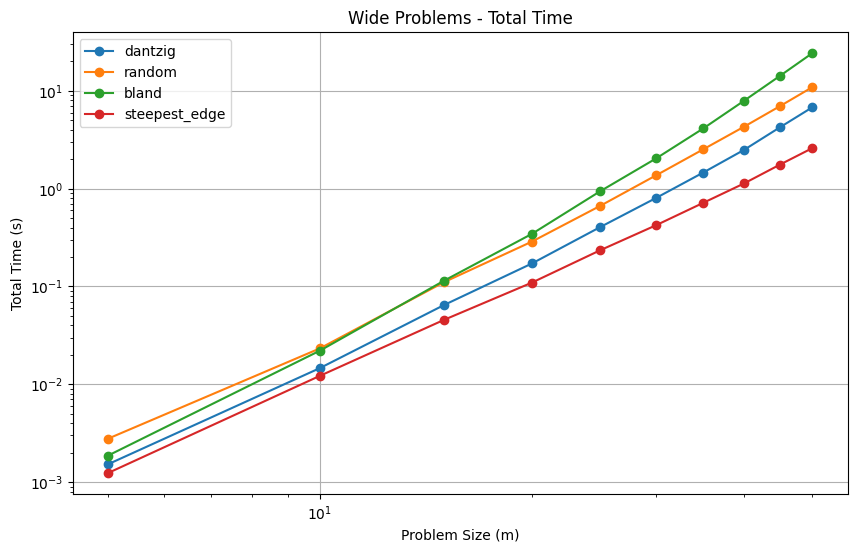

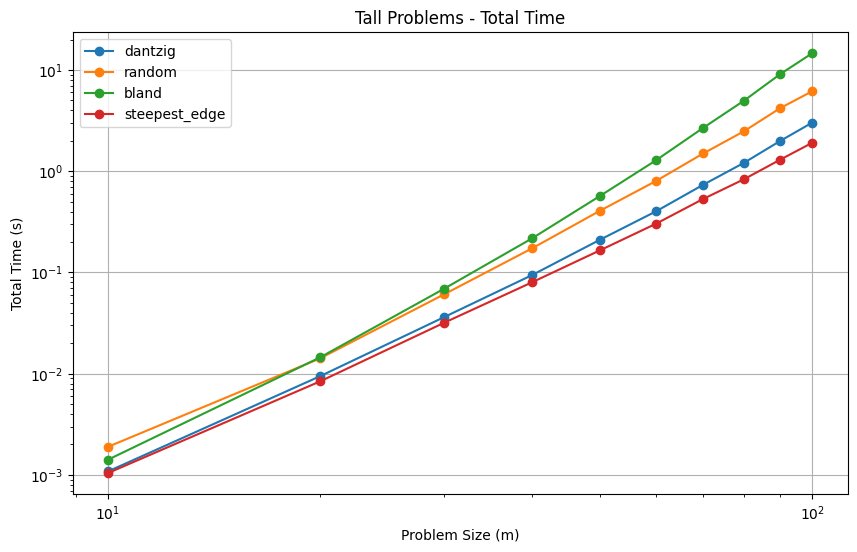

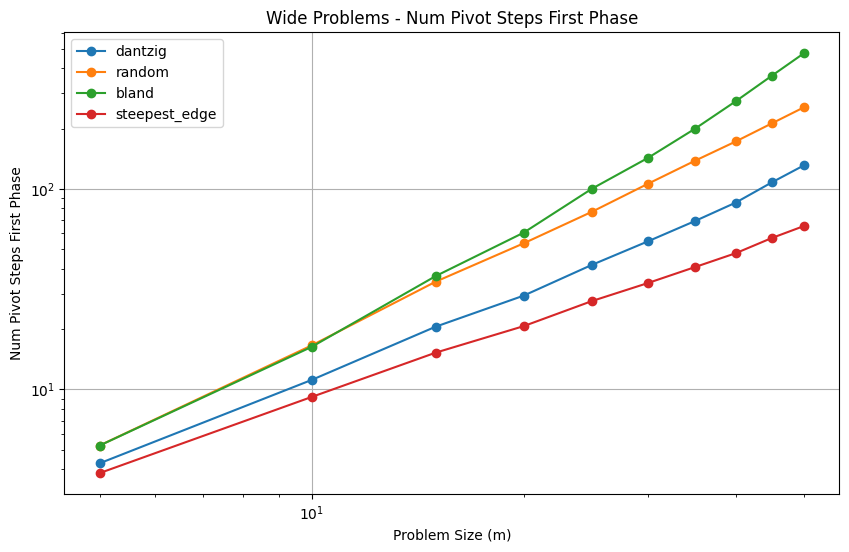

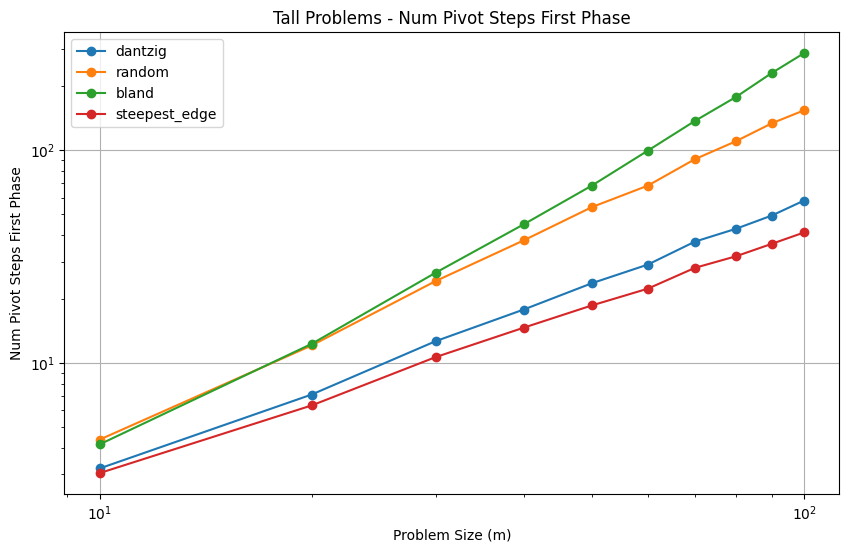

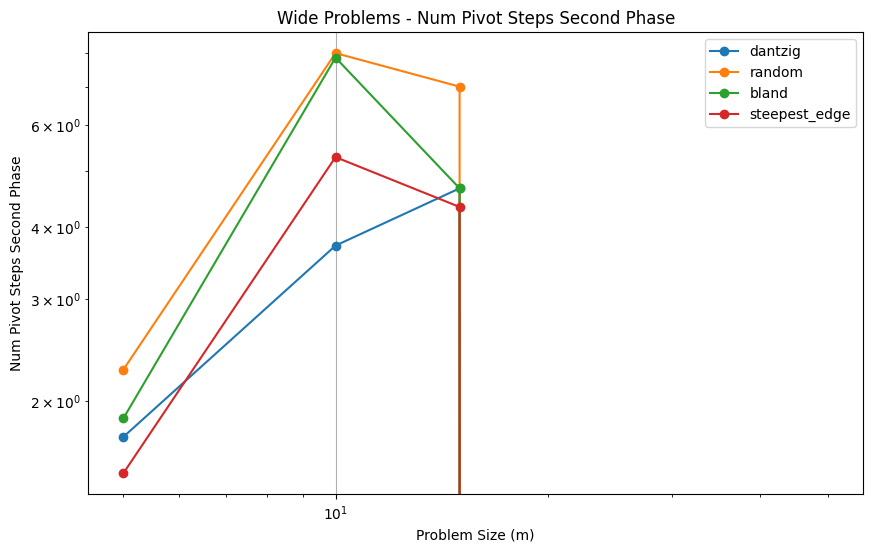

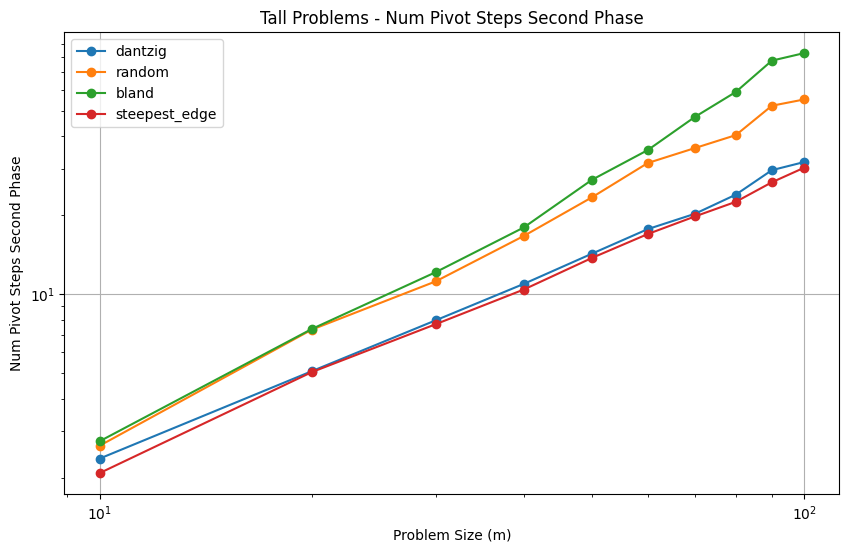

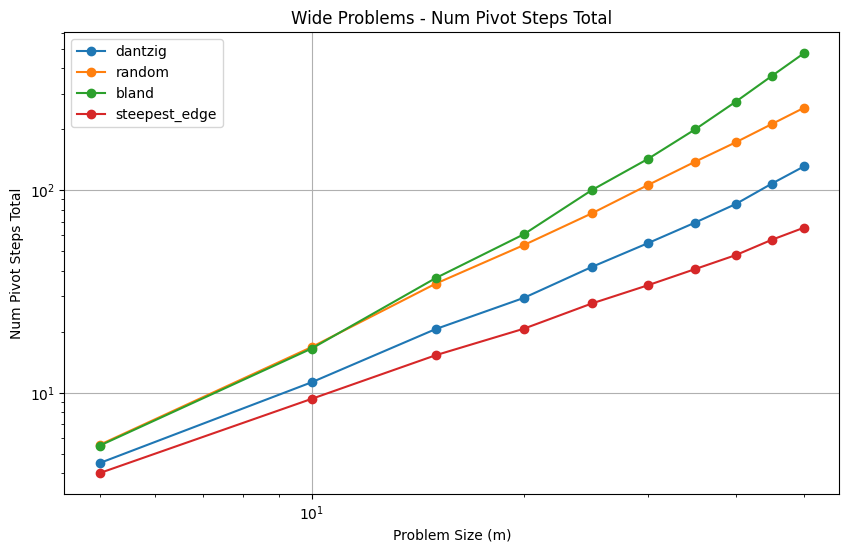

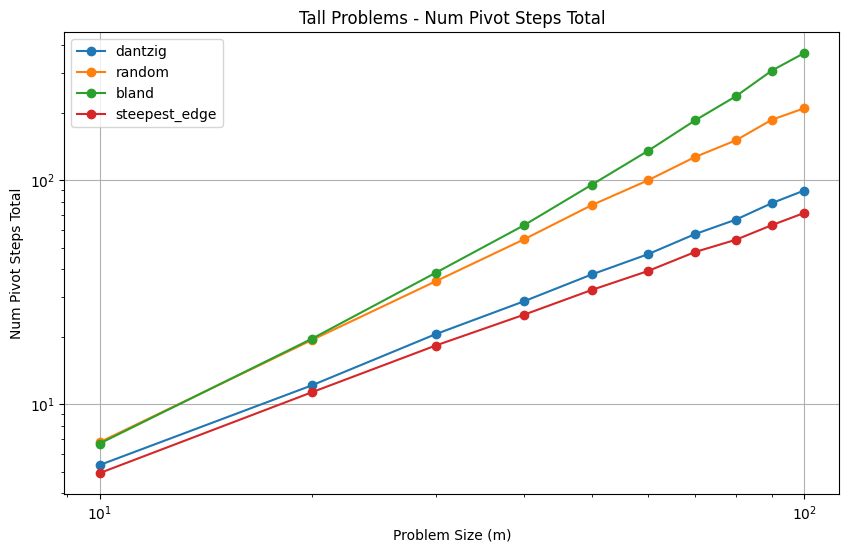

In [14]:

import matplotlib.pyplot as plt

# Storage for plotting
plot_data = {cat: {metric: {rule: [] for rule in pivot_rules} for metric in metrics} for cat in categories}

# Read stored averages
for category, sizes in categories.items():
    for size in sizes:
        folder_name = f"{size[0]}x{size[1]}"
        folder_path = os.path.join(root_folder, category, folder_name)
        avg_file = os.path.join(folder_path, "averages.json")

        if not os.path.exists(avg_file):
            print(avg_file)
            continue
        
        with open(avg_file, "r") as f:
            avg_results = json.load(f)

        for metric in metrics:
            for rule in pivot_rules:
                plot_data[category][metric][rule].append(avg_results.get(metric, {}).get(rule, 0))

for category in categories:
    for rule in pivot_rules:
        plot_data[category]["total_time"][rule] = [t / 1000 for t in plot_data[category]["total_time"][rule]]

# Generate plots
for metric in metrics:
    for category, sizes in categories.items():
        plt.figure(figsize=(10, 6))
        
        for rule in pivot_rules:
            plt.plot([s[0] for s in sizes], plot_data[category][metric][rule], label=rule, marker="o")
        
        plt.xlabel("Problem Size (m)")
        ylabel = metric.replace("_", " ").title()
        if metric == "total_time":
            ylabel += " (s)"
        plt.ylabel(ylabel)
        plt.title(f"{category.replace('_', ' ').title()} - {metric.replace('_', ' ').title()}")
        plt.legend()
        plt.grid(True)
        plt.xscale("log")
        plt.yscale("log")

        if not os.path.exists("./plots"):
            os.mkdir("plots")
        
        if not os.path.exists(os.path.join("plots", "pivot_rules")):
            os.mkdir(os.path.join("plots", "pivot_rules"))
        
        if not os.path.exists(os.path.join("plots", "pivot_rules", "two_phases")):
            os.mkdir(os.path.join("plots", "pivot_rules", "two_phases"))
        
        if not os.path.exists(os.path.join("plots", "pivot_rules", "two_phases", category.split("_")[0])):
            os.mkdir(os.path.join("plots", "pivot_rules", "two_phases", category.split("_")[0]))
        

        plt.savefig(os.path.join("plots", "pivot_rules", "two_phases", category.split("_")[0], f"{category.split('_')[0]}_{metric}_log.pdf"), format="pdf")

        plt.show()

### For Balanced

In [10]:
import numpy as np

In [15]:
pivot_rules = ["dantzig", "random", "steepest_edge"]
metrics = ["total_time", "num_pivot_steps_first_phase", "num_pivot_steps_second_phase", "num_pivot_steps_total"]
categories = {
    "balanced_problems": balanced_sizes
}
results = {cat: {metric: {rule: [] for rule in pivot_rules} for metric in metrics} for cat in categories}

# Iterate through categories and sizes
for category, sizes in categories.items():
    for size in sizes:
        folder_name = f"{size[0]}x{size[1]}"
        folder_path = os.path.join(root_folder, category, folder_name)
        
        if not os.path.exists(folder_path):
            print("incorrect folder")
            continue
        
        avg_results = {metric: {} for metric in metrics}
        
        for rule in pivot_rules:
            file_path = os.path.join(folder_path, f"{rule}_results.json")
            if not os.path.exists(file_path):
                print("incorrect file")
                continue
            
            with open(file_path, "r") as f:
                data = json.load(f)
            
            # Extract values
            total_time = [entry["total_time"] for entry in data.values()]
            num_pivot_steps_first_phase = [entry["num_pivot_steps_first_phase"] for entry in data.values() if "num_pivot_steps_first_phase" in entry]
            num_pivot_steps_second_phase = [entry["num_pivot_steps_second_phase"] for entry in data.values() if "num_pivot_steps_second_phase" in entry]
            
            # Compute and store averages
            avg_results["total_time"][rule] = np.mean(total_time) if total_time else 0
            avg_results["num_pivot_steps_first_phase"][rule] = np.mean(num_pivot_steps_first_phase) if num_pivot_steps_first_phase else 0
            avg_results["num_pivot_steps_second_phase"][rule] = np.mean(num_pivot_steps_second_phase) if num_pivot_steps_second_phase else 0

            num_pivot_steps_second_phase = [
                entry.get("num_pivot_steps_second_phase", 0) for entry in data.values()
            ]

            num_pivot_steps_total = [
                first + second for first, second in zip(num_pivot_steps_first_phase, num_pivot_steps_second_phase)
            ]
            avg_results["num_pivot_steps_total"][rule] = np.mean(num_pivot_steps_total) if num_pivot_steps_total else 0

        # Save averages to JSON file in the same folder
        with open(os.path.join(folder_path, "averages.json"), "w") as f:
            json.dump(avg_results, f, indent=4)

print("Averages computed and stored successfully!")

Averages computed and stored successfully!


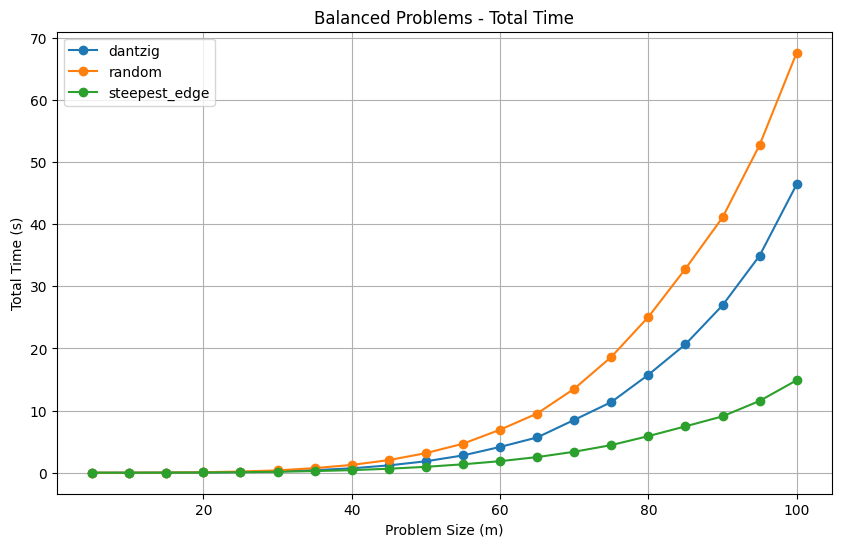

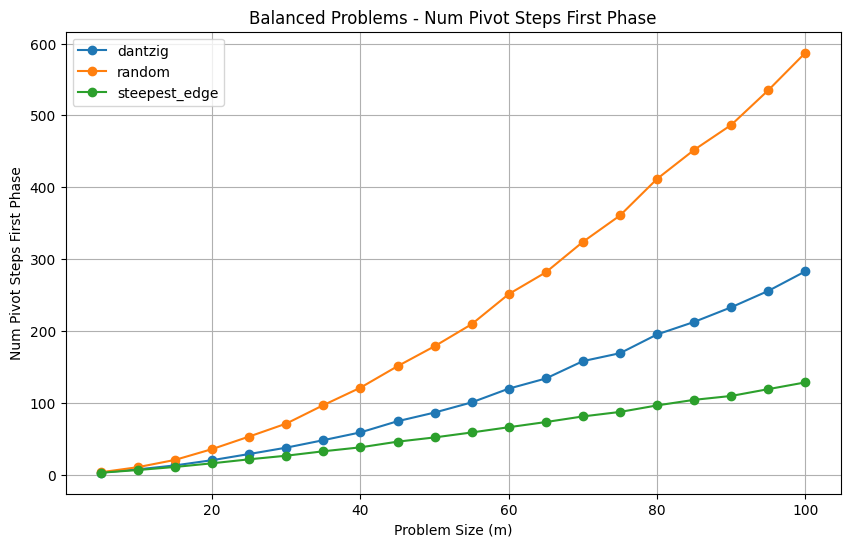

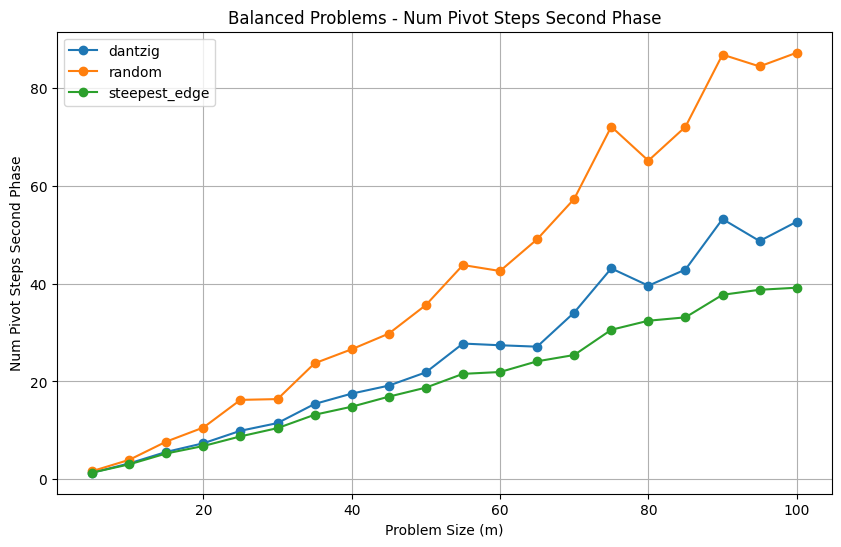

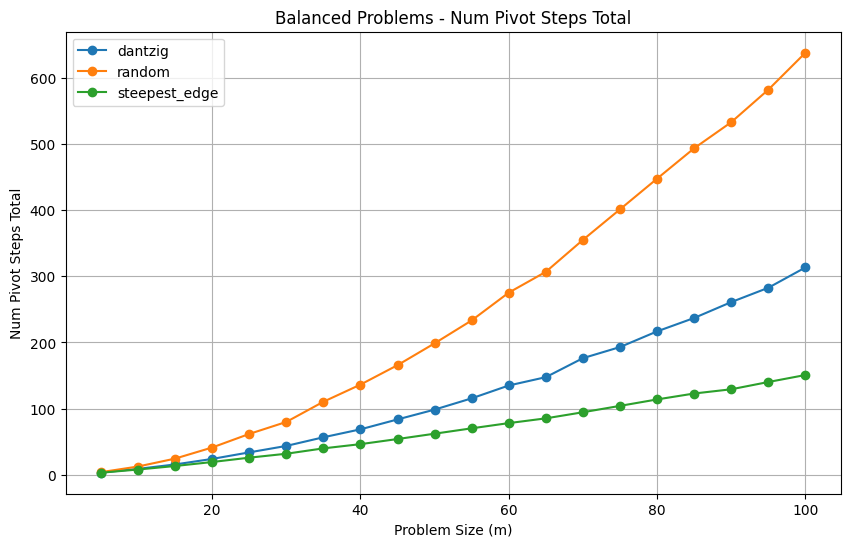

In [ ]:

import matplotlib.pyplot as plt

# Storage for plotting
plot_data = {cat: {metric: {rule: [] for rule in pivot_rules} for metric in metrics} for cat in categories}

# Read stored averages
for category, sizes in categories.items():
    for size in sizes:
        folder_name = f"{size[0]}x{size[1]}"
        folder_path = os.path.join(root_folder, category, folder_name)
        avg_file = os.path.join(folder_path, "averages.json")

        if not os.path.exists(avg_file):
            print(avg_file)
            continue
        
        with open(avg_file, "r") as f:
            avg_results = json.load(f)

        for metric in metrics:
            for rule in pivot_rules:
                plot_data[category][metric][rule].append(avg_results.get(metric, {}).get(rule, 0))

for category in categories:
    for rule in pivot_rules:
        plot_data[category]["total_time"][rule] = [t / 1000 for t in plot_data[category]["total_time"][rule]]

# Generate plots
for metric in metrics:
    for category, sizes in categories.items():
        plt.figure(figsize=(10, 6))
        
        for rule in pivot_rules:
            plt.plot([s[0] for s in sizes], plot_data[category][metric][rule], label=rule, marker="o")
        
        plt.xlabel("Problem Size (m)")
        ylabel = metric.replace("_", " ").title()
        if metric == "total_time":
            ylabel += " (s)"
        plt.ylabel(ylabel)
        plt.title(f"{category.replace('_', ' ').title()} - {metric.replace('_', ' ').title()}")
        plt.legend()
        plt.grid(True)

        if not os.path.exists("./plots"):
            os.mkdir("plots")
        
        if not os.path.exists(os.path.join("plots", "pivot_rules")):
            os.mkdir(os.path.join("plots", "pivot_rules"))
        
        if not os.path.exists(os.path.join("plots", "pivot_rules", "two_phases")):
            os.mkdir(os.path.join("plots", "pivot_rules", "two_phases"))
        
        if not os.path.exists(os.path.join("plots", "pivot_rules", "two_phases", "balanced")):
            os.mkdir(os.path.join("plots", "pivot_rules", "two_phases", "balanced"))

        plt.savefig(os.path.join("plots", "pivot_rules", "two_phases", "balanced",  f"{category.split('_')[0]}_{metric}.pdf"), format="pdf")

        plt.show()

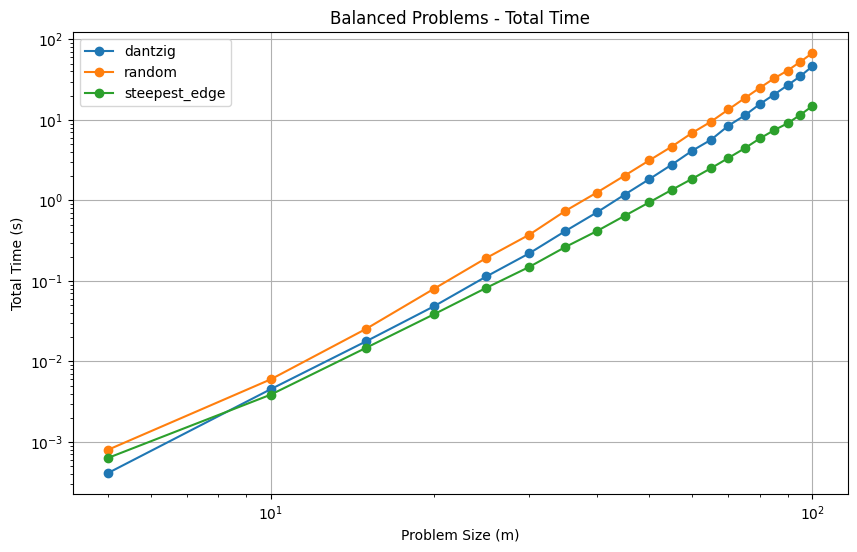

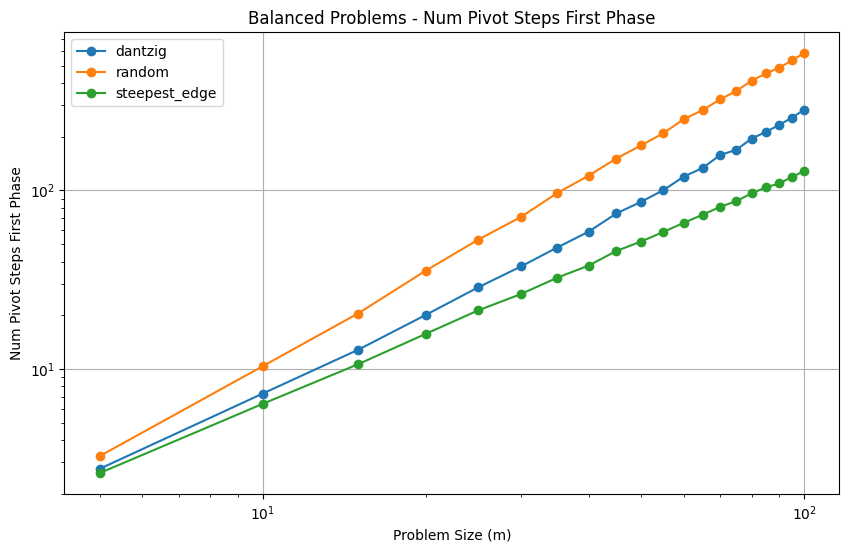

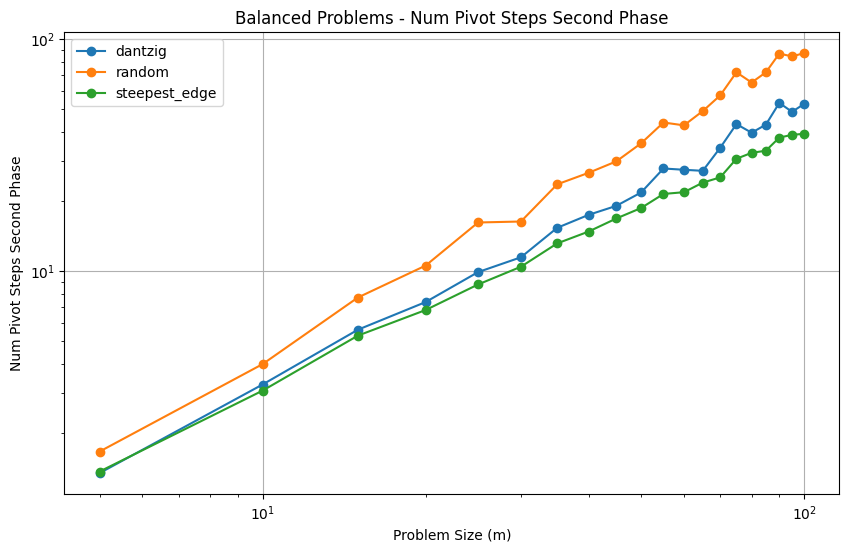

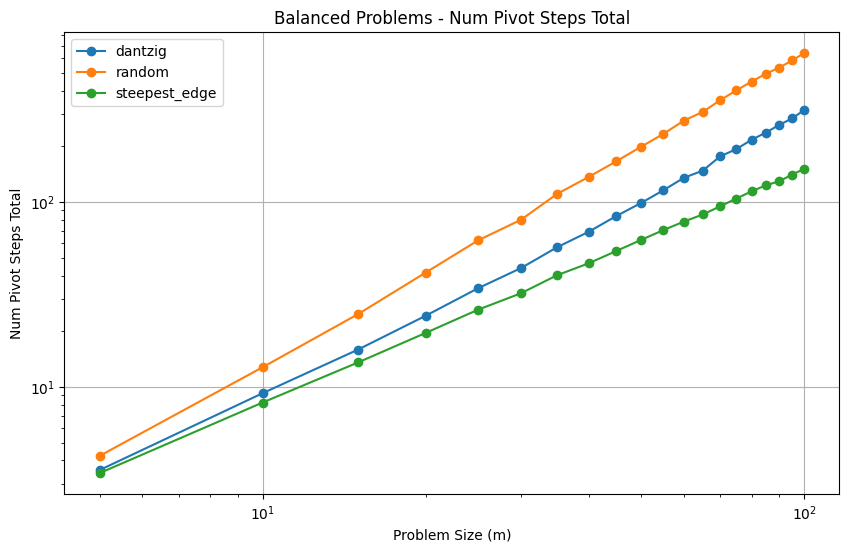

In [19]:

import matplotlib.pyplot as plt

# Storage for plotting
plot_data = {cat: {metric: {rule: [] for rule in pivot_rules} for metric in metrics} for cat in categories}

# Read stored averages
for category, sizes in categories.items():
    for size in sizes:
        folder_name = f"{size[0]}x{size[1]}"
        folder_path = os.path.join(root_folder, category, folder_name)
        avg_file = os.path.join(folder_path, "averages.json")

        if not os.path.exists(avg_file):
            print(avg_file)
            continue
        
        with open(avg_file, "r") as f:
            avg_results = json.load(f)

        for metric in metrics:
            for rule in pivot_rules:
                plot_data[category][metric][rule].append(avg_results.get(metric, {}).get(rule, 0))

for category in categories:
    for rule in pivot_rules:
        plot_data[category]["total_time"][rule] = [t / 1000 for t in plot_data[category]["total_time"][rule]]

# Generate plots
for metric in metrics:
    for category, sizes in categories.items():
        plt.figure(figsize=(10, 6))
        
        for rule in pivot_rules:
            plt.plot([s[0] for s in sizes], plot_data[category][metric][rule], label=rule, marker="o")
        
        plt.xlabel("Problem Size (m)")
        ylabel = metric.replace("_", " ").title()
        if metric == "total_time":
            ylabel += " (s)"
        plt.ylabel(ylabel)
        plt.yscale("log")
        plt.xscale("log")
        plt.title(f"{category.replace('_', ' ').title()} - {metric.replace('_', ' ').title()}")
        plt.legend()
        plt.grid(True)


        if not os.path.exists("./plots"):
            os.mkdir("plots")
        
        if not os.path.exists(os.path.join("plots", "pivot_rules")):
            os.mkdir(os.path.join("plots", "pivot_rules"))
        
        if not os.path.exists(os.path.join("plots", "pivot_rules", "two_phases")):
            os.mkdir(os.path.join("plots", "pivot_rules", "two_phases"))
        
        if not os.path.exists(os.path.join("plots", "pivot_rules", "two_phases", "balanced")):
            os.mkdir(os.path.join("plots", "pivot_rules", "two_phases", "balanced"))

        plt.savefig(os.path.join("plots", "pivot_rules", "two_phases", "balanced",  f"{category.split('_')[0]}_{metric}_log.pdf"), format="pdf")

        plt.show()

### Separated by problem status

In [20]:
import numpy as np

pivot_rules = ["dantzig", "random", "steepest_edge"]
metrics = ["total_time", "num_pivot_steps_first_phase", "num_pivot_steps_second_phase", "num_pivot_steps_total"]
categories = {
    "balanced_problems": balanced_sizes
}
results = {cat: {metric: {rule: [] for rule in pivot_rules} for metric in metrics} for cat in categories}
statuses = ["Optimal", "Infeasible", "Unbounded"]

# Iterate through categories and sizes
for category, sizes in categories.items():
    for size in sizes:
        folder_name = f"{size[0]}x{size[1]}"
        folder_path = os.path.join(root_folder, category, folder_name)
        
        if not os.path.exists(folder_path):
            print("incorrect folder")
            continue
        
        for status in statuses:
            avg_results = {metric: {} for metric in metrics}
            for rule in pivot_rules:
                file_path = os.path.join(folder_path, f"{rule}_results.json")

                if not os.path.exists(file_path):
                    print("incorrect file")
                    continue
                
                with open(file_path, "r") as f:
                    data = json.load(f)

                filtered_data = {key: data[key] for key in data if data[key]["status"] == status}

                # Extract values
                total_time = [entry["total_time"] for entry in filtered_data.values()]
                num_pivot_steps_first_phase = [entry["num_pivot_steps_first_phase"] for entry in filtered_data.values() if "num_pivot_steps_first_phase" in entry]
                num_pivot_steps_second_phase = [entry["num_pivot_steps_second_phase"] for entry in filtered_data.values() if "num_pivot_steps_second_phase" in entry]
                
                # Compute and store averages
                avg_results["total_time"][rule] = np.mean(total_time) if total_time else 0
                avg_results["num_pivot_steps_first_phase"][rule] = np.mean(num_pivot_steps_first_phase) if num_pivot_steps_first_phase else 0
                avg_results["num_pivot_steps_second_phase"][rule] = np.mean(num_pivot_steps_second_phase) if num_pivot_steps_second_phase else 0

                num_pivot_steps_second_phase = [
                    entry.get("num_pivot_steps_second_phase", 0) for entry in filtered_data.values()
                ]

                num_pivot_steps_total = [
                    first + second for first, second in zip(num_pivot_steps_first_phase, num_pivot_steps_second_phase)
                ]
                avg_results["num_pivot_steps_total"][rule] = np.mean(num_pivot_steps_total) if num_pivot_steps_total else 0

            # Save averages to JSON file in the same folder
            with open(os.path.join(folder_path, f"averages_{status}.json"), "w") as f:
                json.dump(avg_results, f, indent=4)

print("Averages computed and stored successfully!")

Averages computed and stored successfully!


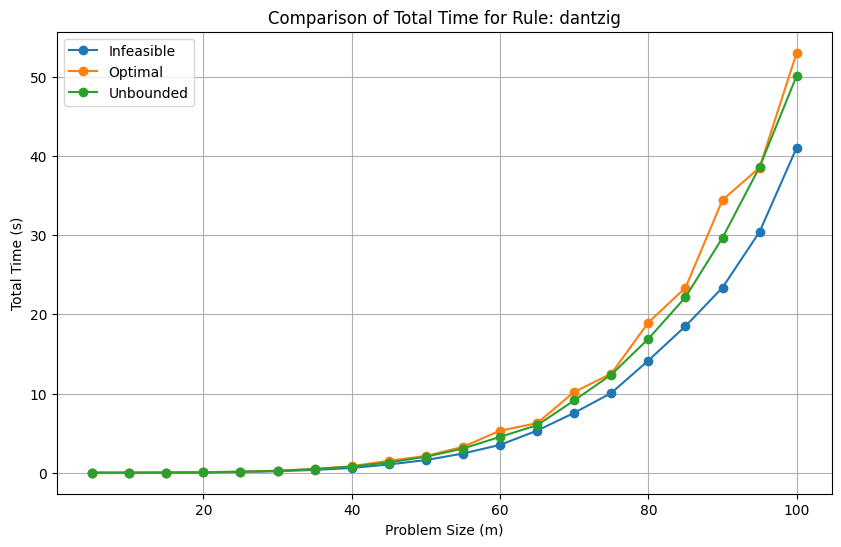

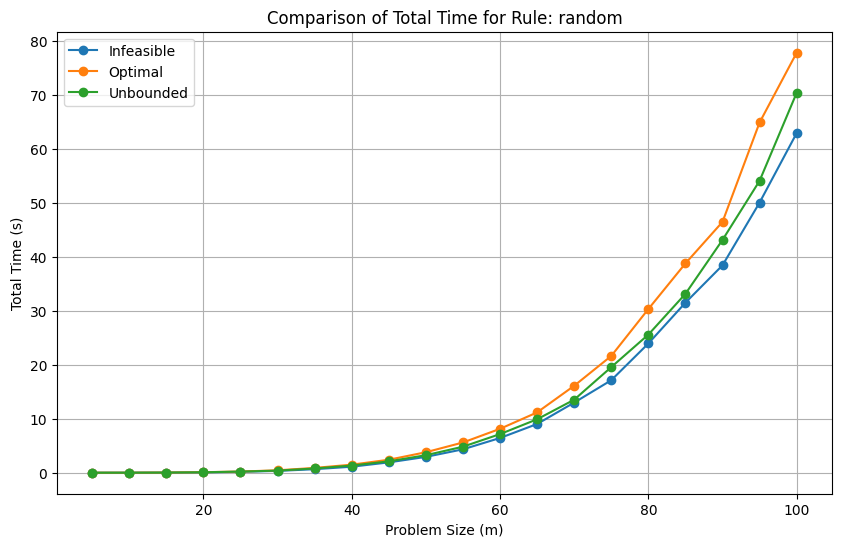

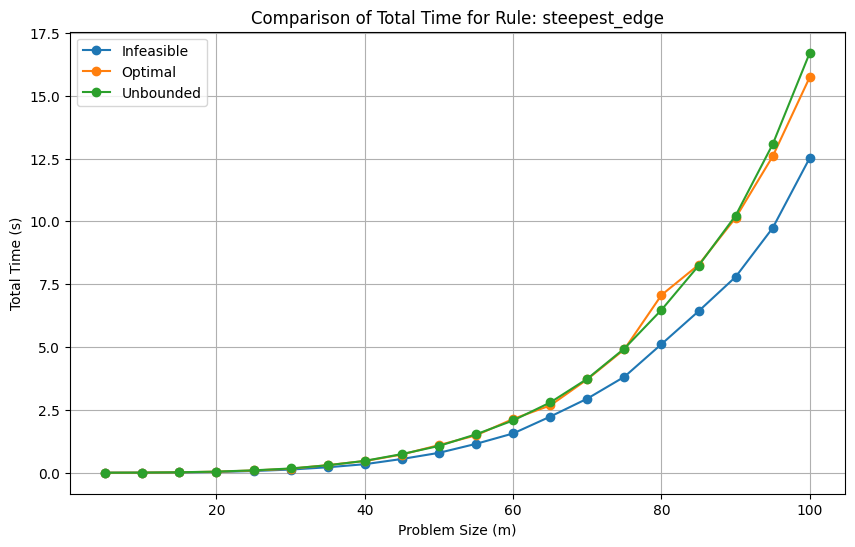

In [29]:
import os
import json
import matplotlib.pyplot as plt

# Storage for plotting
plot_data = {rule: {"Infeasible": [], "Optimal": [], "Unbounded": []} for rule in pivot_rules}

# Read stored averages for different statuses
for category, sizes in categories.items():
    for size in sizes:
        folder_name = f"{size[0]}x{size[1]}"
        folder_path = os.path.join(root_folder, category, folder_name)
        
        for status in ["Infeasible", "Optimal", "Unbounded"]:
            avg_file = os.path.join(folder_path, f"averages_{status}.json")

            if not os.path.exists(avg_file):
                print(f"File not found: {avg_file}")
                continue
            
            with open(avg_file, "r") as f:
                avg_results = json.load(f)

            # Extract the total time for each pivot rule
            for rule in pivot_rules:
                total_time = avg_results.get("total_time", {}).get(rule, 0)
                plot_data[rule][status].append(total_time / 1000)  # Convert from ms to seconds

# Generate plots for each pivot rule
for rule in pivot_rules:
    plt.figure(figsize=(10, 6))

    # Plot total time for each problem status
    for status in ["Infeasible", "Optimal", "Unbounded"]:
        plt.plot([s[0] for s in sizes], plot_data[rule][status], label=status, marker="o")
    
    plt.xlabel("Problem Size (m)")
    plt.ylabel("Total Time (s)")

    plt.title(f"Comparison of Total Time for Rule: {rule}")
    plt.legend()
    plt.grid(True)

    # Create directories if they do not exist
    if not os.path.exists("./plots"):
        os.mkdir("plots")
    if not os.path.exists(os.path.join("plots", "pivot_rules")):
        os.mkdir(os.path.join("plots", "pivot_rules"))
    
    # Save plot
    plt.savefig(os.path.join("plots", "pivot_rules", f"{rule}_total_time_comparison.pdf"), format="pdf")

    plt.show()
